In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 100)

read the dataframe from Data Preparation + EDA notebook

In [2]:
master=pd.read_csv('price_clean.csv')

# Preparation

In [3]:
perform=[] #list for store the performance each model

In [4]:
master.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
master=master.set_index('id')

In [6]:
master.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,mean,len_amenities,is_cheap_dorm,label,guests_included_fixed
id,,,,,,,,,,,,,,,,,,,,,
49091,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,...,94.0,f,1.0,0.0,0.0,0.210000,8,0,1,1.0
50646,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.27,1,...,91.0,f,1.0,0.0,0.0,0.411838,12,0,1,2.0
56334,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,...,98.0,f,1.0,0.0,0.0,0.389094,9,0,1,1.0
71609,East Region,Tampines,1.34541,103.95712,Private room,204,1,15,0.16,9,...,84.0,t,1.0,275.0,55.0,0.254007,25,0,4,4.0
71896,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,...,81.0,t,0.5,138.0,28.0,0.277114,21,0,1,1.0


In [7]:
master['bedrooms']=master['bedrooms'].astype(int)
master['beds']=master['beds'].astype(int)
master['bathrooms']=master['bathrooms'].astype(int)
master['label']=master['label'].astype(str)

In [8]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7348 entries, 49091 to 38890018
Data columns (total 26 columns):
neighbourhood_group               7348 non-null object
neighbourhood                     7348 non-null object
latitude                          7348 non-null float64
longitude                         7348 non-null float64
room_type                         7348 non-null object
price                             7348 non-null int64
minimum_nights                    7348 non-null int64
number_of_reviews                 7348 non-null int64
reviews_per_month                 7348 non-null float64
calculated_host_listings_count    7348 non-null int64
availability_365                  7348 non-null int64
host_is_superhost                 7348 non-null object
property_type                     7348 non-null object
bedrooms                          7348 non-null int32
beds                              7348 non-null int32
guests_included                   7348 non-null int64
review_sco

In [9]:
master.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,mean,len_amenities,is_cheap_dorm,guests_included_fixed
count,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000
mean,1.314721,103.848960,135.348530,18.448013,13.523272,0.690795,39.731083,207.707267,1.272999,1.888949,1.924333,58.430593,1.485983,172.572128,28.621938,0.208622,20.770822,0.031029,2.045863
std,0.030261,0.044058,87.093962,39.896724,30.624108,1.166574,66.124091,145.824110,0.841968,2.059063,1.462658,44.340648,1.146987,361.961284,38.926062,0.199331,10.178080,0.173407,1.523267
min,1.242790,103.665470,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,1.296680,103.836870,63.000000,2.000000,0.000000,0.000000,2.000000,59.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,1.000000
50%,1.311315,103.849950,118.000000,3.000000,2.000000,0.180000,9.000000,267.000000,1.000000,1.000000,1.000000,86.000000,1.000000,0.000000,20.000000,0.247694,19.000000,0.000000,1.000000
75%,1.322573,103.876028,184.000000,14.000000,11.000000,0.860000,46.000000,355.000000,2.000000,2.000000,2.000000,96.000000,2.000000,250.000000,49.000000,0.352553,27.000000,0.000000,2.000000
max,1.454590,103.973420,401.000000,365.000000,331.000000,16.110000,285.000000,365.000000,10.000000,36.000000,10.000000,100.000000,21.000000,6500.000000,822.000000,1.000000,72.000000,1.000000,14.000000


## New Feature

In [10]:
# master['bed_density']=master['beds']/master['bedrooms']

In [11]:
master.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,mean,len_amenities,is_cheap_dorm,label,guests_included_fixed
id,,,,,,,,,,,,,,,,,,,,,
49091,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,...,94.0,f,1,0.0,0.0,0.210000,8,0,1,1.0
50646,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.27,1,...,91.0,f,1,0.0,0.0,0.411838,12,0,1,2.0
56334,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,...,98.0,f,1,0.0,0.0,0.389094,9,0,1,1.0
71609,East Region,Tampines,1.34541,103.95712,Private room,204,1,15,0.16,9,...,84.0,t,1,275.0,55.0,0.254007,25,0,4,4.0
71896,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,...,81.0,t,0,138.0,28.0,0.277114,21,0,1,1.0


In [12]:
master.iloc[0]

neighbourhood_group               North Region
neighbourhood                        Woodlands
latitude                               1.44255
longitude                              103.796
room_type                         Private room
price                                       83
minimum_nights                             180
number_of_reviews                            1
reviews_per_month                         0.01
calculated_host_listings_count               2
availability_365                           365
host_is_superhost                            f
property_type                        Apartment
bedrooms                                     1
beds                                         1
guests_included                              1
review_scores_rating                        94
instant_bookable                             f
bathrooms                                    1
security_deposit                             0
cleaning_fee                                 0
mean         

## Heatmap

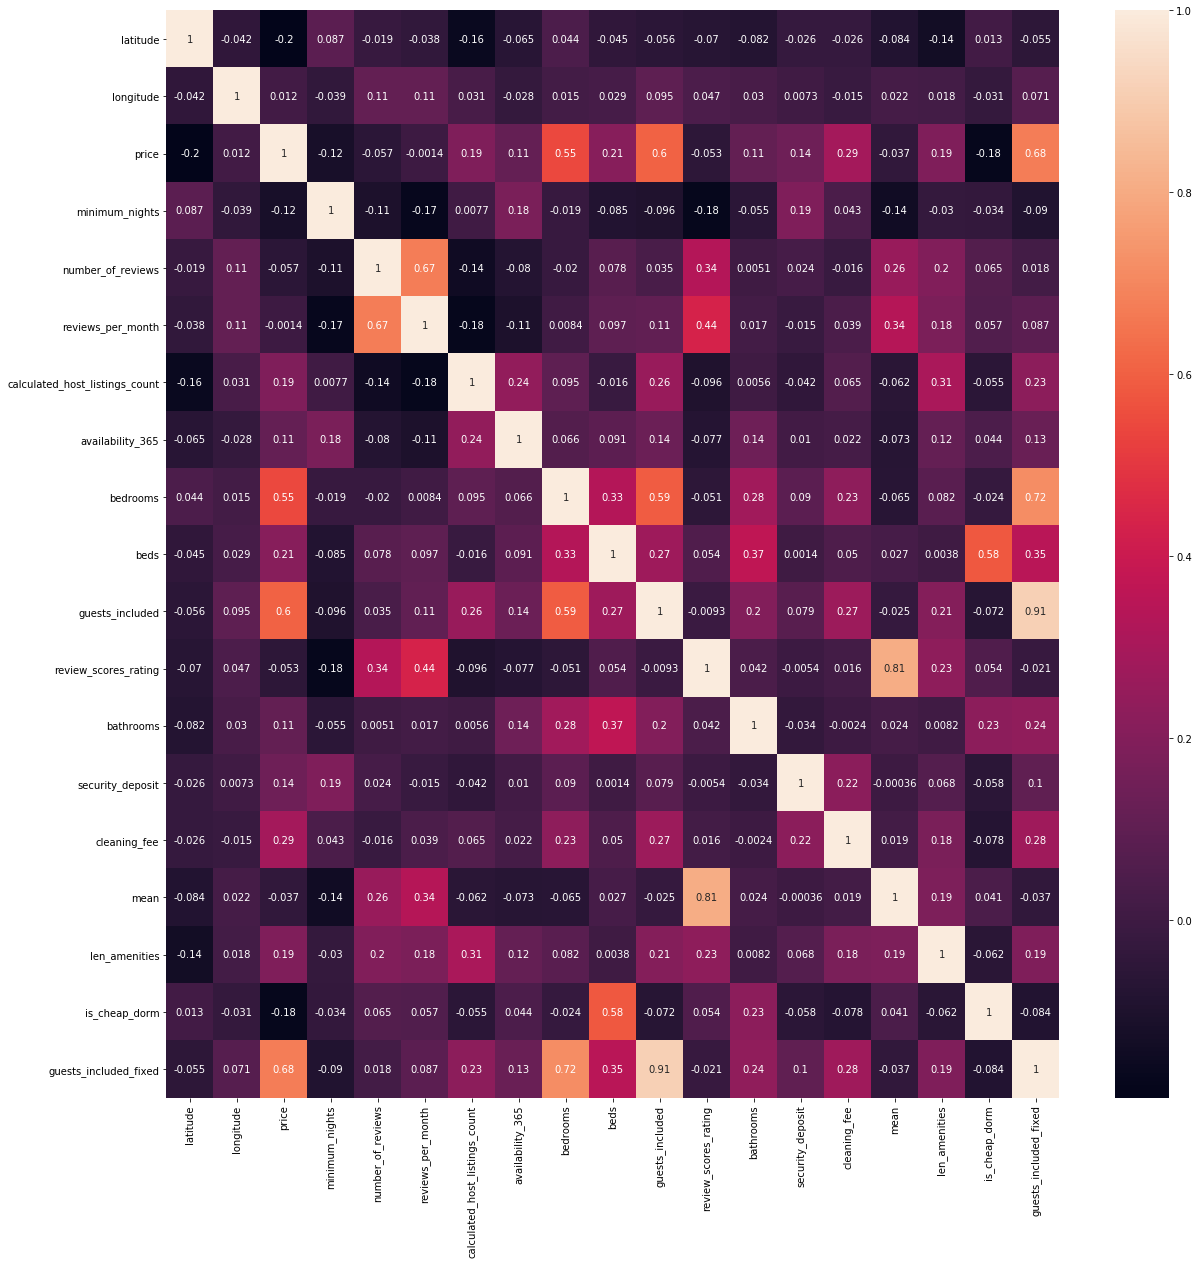

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(master.corr(), annot=True)


In [14]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7348 entries, 49091 to 38890018
Data columns (total 26 columns):
neighbourhood_group               7348 non-null object
neighbourhood                     7348 non-null object
latitude                          7348 non-null float64
longitude                         7348 non-null float64
room_type                         7348 non-null object
price                             7348 non-null int64
minimum_nights                    7348 non-null int64
number_of_reviews                 7348 non-null int64
reviews_per_month                 7348 non-null float64
calculated_host_listings_count    7348 non-null int64
availability_365                  7348 non-null int64
host_is_superhost                 7348 non-null object
property_type                     7348 non-null object
bedrooms                          7348 non-null int32
beds                              7348 non-null int32
guests_included                   7348 non-null int64
review_sco

## Set dummies

In [15]:
price_dummy=pd.get_dummies(data=master, drop_first=True, columns=['neighbourhood_group','neighbourhood','room_type',
                                                                      'host_is_superhost','property_type','instant_bookable',
                                                                 'label'])

In [16]:
price_dummy.shape

(7348, 96)

In [17]:
# price_dummy.isna().sum()

## Change to log
from the pairplot in Data Preparation + EDA notebook, the numerical variable don't fulfill the normal distribution, so in order to maximize the performance of machine learning, I will transform those variables with log transformation

In [18]:
price_dummy['price']=price_dummy['price'].apply(lambda x:np.log1p(x))

In [19]:
price_dummy['minimum_nights']=price_dummy['minimum_nights'].apply(lambda x:np.log1p(x))
price_dummy['latitude']=price_dummy['latitude'].apply(lambda x:np.log1p(x))
price_dummy['longitude']=price_dummy['longitude'].apply(lambda x:np.log1p(x))
price_dummy['number_of_reviews']=price_dummy['number_of_reviews'].apply(lambda x:np.log1p(x))
price_dummy['reviews_per_month']=price_dummy['reviews_per_month'].apply(lambda x:np.log1p(x))
price_dummy['calculated_host_listings_count']=price_dummy['calculated_host_listings_count'].apply(lambda x:np.log1p(x))
price_dummy['availability_365']=price_dummy['availability_365'].apply(lambda x:np.log1p(x))#perhatian
price_dummy['bedrooms']=price_dummy['bedrooms'].apply(lambda x:np.log1p(x))
price_dummy['beds']=price_dummy['beds'].apply(lambda x:np.log1p(x))
price_dummy['guests_included']=price_dummy['guests_included'].apply(lambda x:np.log1p(x))
price_dummy['review_scores_rating']=price_dummy['review_scores_rating'].apply(lambda x:np.log1p(x))
price_dummy['bathrooms']=price_dummy['bathrooms'].apply(lambda x:np.log1p(x))
price_dummy['security_deposit']=price_dummy['security_deposit'].apply(lambda x:np.log1p(x))
price_dummy['cleaning_fee']=price_dummy['cleaning_fee'].apply(lambda x:np.log1p(x))
# price_dummy['mean']=price_dummy['mean'].apply(lambda x:np.log1p(x))
price_dummy['len_amenities']=price_dummy['len_amenities'].apply(lambda x:np.log1p(x))
price_dummy['guests_included_fixed']=price_dummy['guests_included_fixed'].apply(lambda x:np.log1p(x))

the mean variable (which refer to polarity of comments), has negative and zero value, can't be transformed

# feature filter

In [20]:
data_predict=price_dummy.copy()

In [21]:
# data_predict=price_dummy.drop(['beds'],axis=1)

In [22]:
# data_predict=data_predict.drop(['mean'],axis=1)

In [23]:
# data_predict=data_predict.drop(['availability_365'],axis=1)

In [24]:
data_predict=price_dummy.drop(['guests_included'],axis=1)

## Most important feature

In [25]:
correlation=data_predict.corr()

In [26]:
correlation=correlation['price'].sort_values(ascending=False)

In [27]:
correlation

price                                    1.000000
guests_included_fixed                    0.649030
label_4                                  0.441724
label_2                                  0.383097
bedrooms                                 0.369438
beds                                     0.316015
cleaning_fee                             0.303758
security_deposit                         0.299597
property_type_Serviced apartment         0.297258
calculated_host_listings_count           0.265448
len_amenities                            0.231193
property_type_Condominium                0.151968
neighbourhood_Downtown Core              0.142491
host_is_superhost_t                      0.138682
neighbourhood_Novena                     0.133150
availability_365                         0.120643
neighbourhood_Orchard                    0.092803
bathrooms                                0.087882
neighbourhood_Tanglin                    0.075123
neighbourhood_Geylang                    0.067601


In [28]:
# New feature for  top 5 positive correlation
data_predict['bedrooms-s2']=data_predict['bedrooms']**2
data_predict['bedrooms-s3']=data_predict['bedrooms']**3

data_predict['guests_included_fixed-s2']=data_predict['guests_included_fixed']**2
data_predict['guests_included_fixed-s3']=data_predict['guests_included_fixed']**3

data_predict['cleaning_fee-s2']=data_predict['cleaning_fee']**2
data_predict['cleaning_fee-s3']=data_predict['cleaning_fee']**3

data_predict['beds-s2']=data_predict['beds']**2
data_predict['beds-s3']=data_predict['beds']**3

data_predict['security_deposit-s2']=data_predict['security_deposit']**2
data_predict['security_deposit-s3']=data_predict['security_deposit']**3

# Predict

## Split

In [29]:
target_price=data_predict['price']

In [30]:
data_price=data_predict.drop(['price'],axis=1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_price, target_price, test_size=0.2)

## Cross Validation

In [33]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

In [34]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 5))
    return(rmse)

I'll use the RMSE for score rating because I want to give bigger penalize if the prediction is too far from real data

## Linear Model

In [35]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

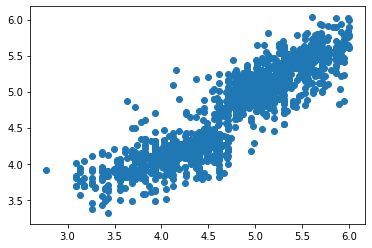

In [36]:
linear=LinearRegression()
linear.fit(X_train,y_train)
price_pred = linear.predict(X_test)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,price_pred)

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, price_pred))
print('MSE:', metrics.mean_squared_error(y_test, price_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, price_pred)))
print('R2:', metrics.r2_score(y_test, price_pred))

MAE: 0.2222746259295916
MSE: 0.08333871956185203
RMSE: 0.28868446366552536
R2: 0.8189875966763865


In [39]:
print("RMSE on Training set :", rmse_cv_train(linear).mean())
print("RMSE on Test set :", rmse_cv_test(linear).mean())

RMSE on Training set : 0.29901890094492123
RMSE on Test set : 0.30472863889466917


In [40]:
perform.append(['linear_1', rmse_cv_train(linear).mean(), rmse_cv_test(linear).mean()])

## Ridge Linear Regression

In [41]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
predict_train_ridge = ridge.predict(X_train)
predict_test_ridge = ridge.predict(X_test)

Best alpha : 6.0
Try again for more precision with alphas centered around 6.0
Best alpha : 5.1
Ridge RMSE on Training set : 0.2980731107638676
Ridge RMSE on Test set : 0.30153720962093067


In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_test_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predict_test_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_test_ridge)))
print('R2:', metrics.r2_score(y_test, predict_test_ridge))

MAE: 0.22268000439004915
MSE: 0.08384228501290002
RMSE: 0.2895553228882177
R2: 0.8178938482602343


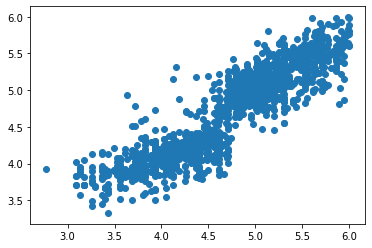

In [43]:
plt.scatter(y_test,predict_test_ridge)

Ridge picked 104 features and eliminated the other 0 features


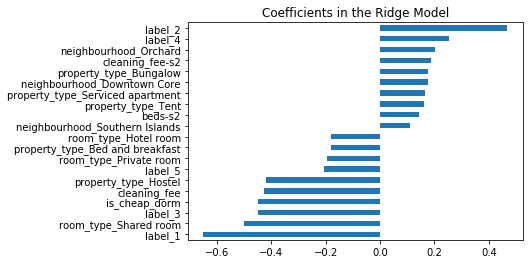

In [44]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [45]:
perform.append(['Ridge_1', rmse_cv_train(ridge).mean(), rmse_cv_test(ridge).mean()])

## Lasso Linear Regression

In [46]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 5)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 5)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
predict_train_lasso = lasso.predict(X_train)
predict_test_lasso = lasso.predict(X_test)

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 0.00014
Lasso RMSE on Training set : 0.2981694054090286
Lasso RMSE on Test set : 0.30461239975115895


In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_test_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predict_test_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_test_ridge)))
print('R2:', metrics.r2_score(y_test, predict_test_ridge))

MAE: 0.22268000439004915
MSE: 0.08384228501290002
RMSE: 0.2895553228882177
R2: 0.8178938482602343


In [48]:
perform.append(['Lasso_1', rmse_cv_train(lasso).mean(), rmse_cv_test(lasso).mean()])

## ElasticNet Regression

In [49]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 3)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 3)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 3)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
predict_train_en = elasticNet.predict(X_train)
predict_test_en = elasticNet.predict(X_test)

Best l1_ratio : 0.7
Best alpha : 0.0003
Try again for more precision with l1_ratio centered around 0.7
Best l1_ratio : 0.6649999999999999
Best alpha : 0.0003
Now try again for more precision on alpha, with l1_ratio fixed at 0.6649999999999999 and alpha centered around 0.0003
Best l1_ratio : 0.6649999999999999
Best alpha : 0.0003
ElasticNet RMSE on Training set : 0.2982248231687707
ElasticNet RMSE on Test set : 0.3026401814673747


In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_test_en))
print('MSE:', metrics.mean_squared_error(y_test, predict_test_en))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_test_en)))
print('R2:', metrics.r2_score(y_test, predict_test_en))

MAE: 0.2229439810471573
MSE: 0.08406815421357208
RMSE: 0.28994508827288673
R2: 0.8174032584471752


In [51]:
perform.append(['elasticNet_1', rmse_cv_train(elasticNet).mean(), rmse_cv_test(elasticNet).mean()])

## Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
prediction_rf=rf.predict(X_test)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rf))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf)))
print('R2 score:', metrics.r2_score(y_test, prediction_rf))

MAE: 0.17866830351589313
MSE: 0.06736118557026567
RMSE: 0.25954033515094654
R2 score: 0.8536909355590449


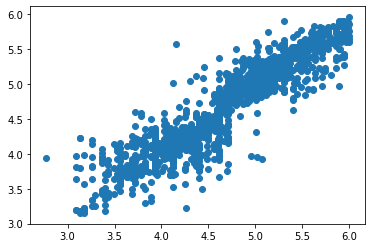

In [56]:
plt.scatter(y_test, prediction_rf)

In [57]:
perform.append(['random_forest1', rmse_cv_train(rf).mean(), rmse_cv_test(rf).mean()])

### Tuning Random Forest

In [58]:
from bayes_opt import BayesianOptimization

In [59]:
def rf_evaluate(max_depth,min_samples_split,min_samples_leaf,n_estimators ):
    model=RandomForestRegressor(max_depth=int(max_depth),
                               min_samples_split=int(min_samples_split),
                               min_samples_leaf=int(min_samples_leaf),
                               n_estimators =int(n_estimators) 
                               )    
    cv_result=rmse_cv_train(model).mean()                         
    
    return -cv_result

In [60]:
rf_bo=BayesianOptimization(rf_evaluate, {'max_depth': (1,20),'min_samples_split':(2,20),'min_samples_leaf':(2,20),
                                        'n_estimators':(10,1000)
                                        })

In [61]:
rf_bo.maximize(init_points=3, n_iter=15)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.2638   |  19.73    |  12.14    |  18.75    |  923.3    |
|  2        | -0.3975   |  2.904    |  5.34     |  8.736    |  657.8    |
|  3        | -0.2725   |  11.42    |  18.93    |  7.307    |  407.9    |
|  4        | -0.4708   |  1.0      |  2.0      |  20.0     |  10.0     |
|  5        | -0.4707   |  1.0      |  2.0      |  2.0      |  1e+03    |
|  6        | -0.2516   |  20.0     |  2.0      |  20.0     |  218.7    |
|  7        | -0.2738   |  20.0     |  20.0     |  2.0      |  819.6    |
|  8        | -0.4707   |  1.0      |  20.0     |  2.0      |  262.7    |
|  9        | -0.2516   |  19.26    |  3.393    |  18.64    |  220.1    |
|  10       | -0.2741   |  20.0     |  20.0     |  20.0     |  526.1    |
|  11       | -0.2739   |  20.0     |  20.0     |  2.0      |  120.5    |
|  12       | -0.4707   |  1.0      | 

In [62]:
rf_bo.max

{'target': -0.25158250073115607,
 'params': {'max_depth': 20.0,
  'min_samples_leaf': 2.0,
  'min_samples_split': 20.0,
  'n_estimators': 218.68722649167114}}

for the tuning process, I have tried the optimization many times and finally get these top 3 combination of best Random Forest

## Best RF 

In [83]:
rf=RandomForestRegressor(max_depth=20,
                       min_samples_split=2,
                       min_samples_leaf=2,
                       n_estimators =77 
                       )

In [84]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=77,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [85]:
prediction_rf=rf.predict(X_test)

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rf))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf)))
print('R2 score:', metrics.r2_score(y_test, prediction_rf))
print("RMSE on Training set :", rmse_cv_train(rf).mean())
print("RMSE on Test set :", rmse_cv_test(rf).mean())

MAE: 0.17349495791403577
MSE: 0.06251063000134856
RMSE: 0.2500212590987986
R2 score: 0.8642263832549119
RMSE on Training set : 0.24636446475588664
RMSE on Test set : 0.29892213896623626


In [87]:
perform.append(['random_forest1_tuned', rmse_cv_train(rf).mean(), rmse_cv_test(rf).mean()])

## XGB Regressor

In [88]:
from xgboost import XGBRegressor

In [89]:
xgboost=XGBRegressor()#(learning_rate=0.01, n_estimators=1000, max_depth=4)

In [90]:
xgboost.fit(X_train,y_train)

[13:54:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [91]:
prediction_XGB=xgboost.predict(X_test)

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_XGB))
print('MSE:', metrics.mean_squared_error(y_test, prediction_XGB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_XGB)))
print('R2 score:', metrics.r2_score(y_test, prediction_XGB))

MAE: 0.20746448319193303
MSE: 0.07423370847798856
RMSE: 0.2724586362697805
R2 score: 0.838763757712255


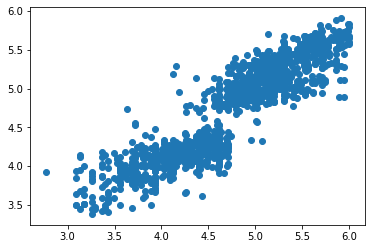

In [93]:
plt.scatter(y_test, prediction_XGB)

In [94]:
print("RMSE on Training set :", rmse_cv_train(xgboost).mean())
print("RMSE on Test set :", rmse_cv_test(xgboost).mean())

[13:55:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on Training set : 0.27459542412489146
[13:55:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:04] WARNING: src/objec

In [95]:
perform.append(['xgboost_1', rmse_cv_train(xgboost).mean(), rmse_cv_test(xgboost).mean()])

[13:55:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

## Tuning XGBoost

In [96]:
from bayes_opt import BayesianOptimization

In [97]:
import xgboost as xgb

In [98]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [99]:
dtest = xgb.DMatrix(X_test)

In [100]:
def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate,min_child_weight,n_estimators):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'learning_rate': learning_rate,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight,
              'n_estimators': n_estimators}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [101]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'learning_rate':(0.01,0.08),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight':(0,2),
                                            'n_estimators':(100,3000)})

In [102]:
xgb_bo.maximize(init_points=3, n_iter=15)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  1        | -0.2717   |  0.6064   |  0.516    |  0.0485   |  5.296    |  0.955    |  2.866e+0 |
|  2        | -0.3078   |  0.4776   |  0.4379   |  0.04071  |  3.081    |  0.9664   |  2.023e+0 |
|  3        | -0.2857   |  0.7499   |  0.37     |  0.06184  |  3.804    |  0.3463   |  1.101e+0 |
|  4        | -0.3724   |  0.4649   |  0.7385   |  0.03004  |  3.79     |  0.4651   |  100.0    |
|  5        | -0.9403   |  0.366    |  0.537    |  0.01572  |  3.098    |  1.205    |  3e+03    |
|  6        | -0.2661   |  0.9      |  0.8637   |  0.08     |  7.0      |  0.0      |  2.502e+0 |
|  7        | -1.599    |  0.3      |  0.0      |  0.01     |  7.0      |  2.0      |  611.2    |
|  8        | -1.599    |  0.3      |  1.0      |  0.01     |  7.0      |  0.0      |  1.54e+03 |
|  9        | -1.602

In [382]:
xgb_bo.max

{'target': -0.2522316666666667,
 'params': {'colsample_bytree': 0.9,
  'gamma': 0.0,
  'learning_rate': 0.08,
  'max_depth': 7.0,
  'min_child_weight': 2.0,
  'n_estimators': 799.6955160786653}}

## Best XGBoost

In [138]:
xgboost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [139]:
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [140]:
prediction_XGB=xgboost.predict(X_test)

In [141]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_XGB))
print('MSE:', metrics.mean_squared_error(y_test, prediction_XGB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_XGB)))
print('R2 score:', metrics.r2_score(y_test, prediction_XGB))

MAE: 0.18276361491433535
MSE: 0.06236504586228528
RMSE: 0.2497299458661001
R2 score: 0.8645425932355331


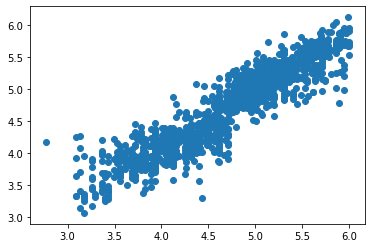

In [142]:
plt.scatter(y_test, prediction_XGB)

In [143]:
print("RMSE on Training set :", rmse_cv_train(xgboost).mean())
print("RMSE on Test set :", rmse_cv_test(xgboost).mean())

RMSE on Training set : 0.2495838626430673
RMSE on Test set : 0.2864883542094626


In [144]:
perform.append(['xgboost_1_tuned', rmse_cv_train(xgboost).mean(), rmse_cv_test(xgboost).mean()])

## Evaluation

In [145]:
perform

[['linear_1', 0.29901890094492123, 0.30472863889466917],
 ['Ridge_1', 0.2980731107638676, 0.30153720962093067],
 ['Lasso_1', 0.2981694054090286, 0.30461239975115895],
 ['elasticNet_1', 0.2982248231687707, 0.3026401814673747],
 ['random_forest1', 0.25377539280999467, 0.30847620193454434],
 ['random_forest1_tuned', 0.24503057177927184, 0.2979206788532014],
 ['xgboost_1', 0.27459542412489146, 0.29992502084886763],
 ['xgboost_1_tuned', 0.2495838626430673, 0.2864883542094626]]

from the performance above, XGBoost_1_tuned give the best result. Furthermore, I will drop Ridge, lasso and elasticnet because even the algorithm have tuned, the performance is not so good even compared to normal linear regression.

In [146]:
backup_perform=perform.copy()

### XGBoost complete evaluation

In [147]:
residual=np.expm1(y_test)-np.expm1(prediction_XGB)

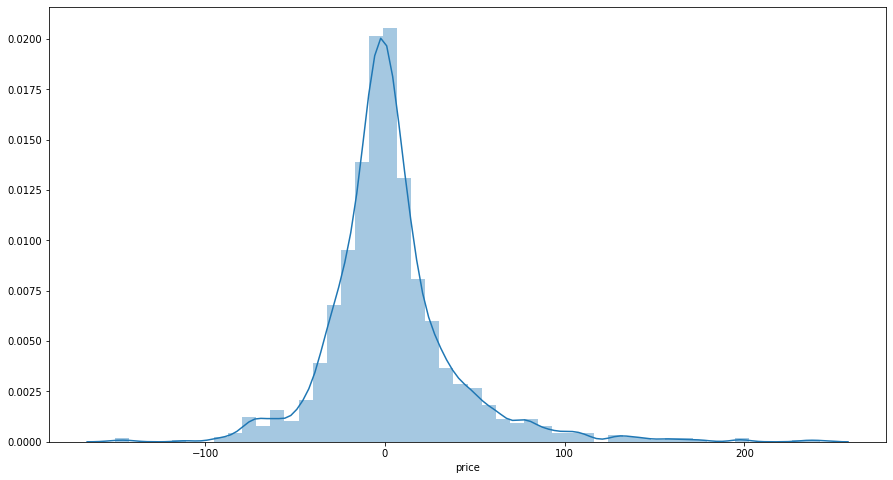

In [148]:
plt.figure(figsize=(15,8))
sns.distplot(residual)

In [150]:
residual.std()

35.542752131515506

## Cut the feature
The data contains nearly 100 columns which is a expensive for computation. let's cut the feature and keep the most important feature

In [151]:
feature_importance=xgboost.get_booster().get_score(importance_type='weight')

In [152]:
# list(feature_importance.keys())

In [153]:
df_feature=pd.DataFrame({'fitur':list(feature_importance.keys()), 'weight':list(feature_importance.values())})

In [154]:
df_feature=df_feature.sort_values('weight', ascending=False)

In [155]:
df_feature

,fitur,weight
10,latitude,1647
22,longitude,1561
12,len_amenities,1004
26,availability_365,859
24,calculated_host_listings_count,692
42,mean,642
35,reviews_per_month,629
25,minimum_nights,605
21,cleaning_fee,563
29,number_of_reviews,382


In [156]:
feat_significant=df_feature[df_feature['weight']>100]['fitur']

In [157]:
list_feat=list(np.array(feat_significant))

In [158]:
data_price.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'bedrooms', 'beds', 'review_scores_rating',
       ...
       'bedrooms-s2', 'bedrooms-s3', 'guests_included_fixed-s2',
       'guests_included_fixed-s3', 'cleaning_fee-s2', 'cleaning_fee-s3',
       'beds-s2', 'beds-s3', 'security_deposit-s2', 'security_deposit-s3'],
      dtype='object', length=104)

In [159]:
data_eliminate=data_price[list_feat]

In [160]:
data_eliminate

,latitude,longitude,len_amenities,availability_365,calculated_host_listings_count,mean,reviews_per_month,minimum_nights,cleaning_fee,number_of_reviews,...,label_1,room_type_Private room,cleaning_fee-s3,room_type_Shared room,beds-s2,instant_bookable_t,bedrooms-s2,property_type_Apartment,guests_included_fixed-s2,security_deposit-s3
id,,,,,,,,,,,,,,,,,,,,,
49091,0.893043,4.652014,2.197225,5.902633,1.098612,0.210000,0.009950,5.198497,0.000000,0.693147,...,1,1,0.000000,0,0.480453,0,0.480453,1,0.480453,0.000000
50646,0.846876,4.651913,2.564949,5.899897,0.693147,0.411838,0.239017,4.510860,0.000000,2.944439,...,1,1,0.000000,0,0.480453,0,0.480453,1,1.206949,0.000000
56334,0.893006,4.652022,2.302585,5.899897,1.098612,0.389094,0.182322,1.945910,0.000000,3.044522,...,1,1,0.000000,0,0.480453,0,0.480453,1,0.480453,0.000000
71609,0.852460,4.653552,3.258097,5.902633,2.302585,0.254007,0.148420,0.693147,4.025352,2.772589,...,0,1,65.224610,0,1.921812,1,1.206949,0,2.590290,177.542314
71896,0.852571,4.653576,3.091042,5.902633,2.302585,0.277114,0.198851,0.693147,3.367296,3.135494,...,1,1,38.180694,0,0.480453,1,0.480453,0,0.480453,120.149669
71903,0.853146,4.653589,2.944439,5.883322,2.302585,0.296756,0.343590,0.693147,3.367296,3.761200,...,1,1,38.180694,0,1.206949,0,0.480453,0,0.480453,120.149669
71907,0.851637,4.653611,2.995732,5.187386,2.302585,0.273176,0.231112,0.693147,4.248495,3.295837,...,0,1,76.684115,0,4.324077,1,0.480453,0,2.590290,177.542314
241503,0.842877,4.653137,3.583519,4.442651,1.609438,0.360908,1.050822,4.510860,0.000000,5.164786,...,1,1,0.000000,0,0.480453,0,0.480453,0,0.480453,149.155678
241508,0.843539,4.653118,3.496508,5.010635,1.609438,0.370017,1.121678,4.510860,0.000000,5.298317,...,1,1,0.000000,0,1.206949,0,0.480453,0,0.480453,149.155678


# Predict 2

## Split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(data_eliminate, target_price, test_size=0.2)

## Linear

In [162]:
linear=LinearRegression()

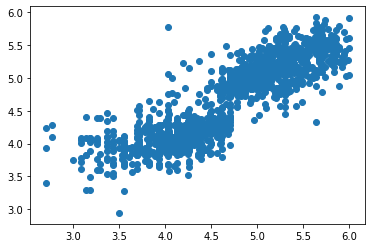

In [163]:
linear.fit(X_train,y_train)
price_pred = linear.predict(X_test)
plt.scatter(y_test,price_pred)

In [164]:
print('MAE:', metrics.mean_absolute_error(y_test, price_pred))
print('MSE:', metrics.mean_squared_error(y_test, price_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, price_pred)))
print('R2:', metrics.r2_score(y_test, price_pred))

MAE: 0.248203365157911
MSE: 0.1082969086750396
RMSE: 0.3290849566222066
R2: 0.7583671339039076


In [165]:
print("RMSE on Training set :", rmse_cv_train(linear).mean())
print("RMSE on Test set :", rmse_cv_test(linear).mean())

RMSE on Training set : 0.3458452313274425
RMSE on Test set : 0.33316565450336855


In [166]:
perform.append(['linear_2', rmse_cv_train(linear).mean(), rmse_cv_test(linear).mean()])

## Random Forest

In [167]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
prediction_rf=rf.predict(X_test)

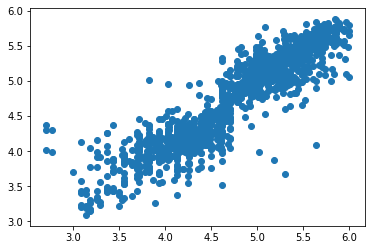

In [168]:
plt.scatter(y_test, prediction_rf)

In [169]:
print('MAE:', metrics.mean_absolute_error(y_test, price_pred))
print('MSE:', metrics.mean_squared_error(y_test, price_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, price_pred)))
print('R2:', metrics.r2_score(y_test, price_pred))

print("RMSE on Training set :", rmse_cv_train(rf).mean())
print("RMSE on Test set :", rmse_cv_test(rf).mean())

MAE: 0.248203365157911
MSE: 0.1082969086750396
RMSE: 0.3290849566222066
R2: 0.7583671339039076
RMSE on Training set : 0.2758455410167749
RMSE on Test set : 0.3166893157492928


In [170]:
perform.append(['rf_2', rmse_cv_train(rf).mean(), rmse_cv_test(rf).mean()])

## Tuning Random Forest

In [171]:
rf_bo=BayesianOptimization(rf_evaluate, {'max_depth': (1,20),'min_samples_split':(2,20),'min_samples_leaf':(2,20),
                                        'n_estimators':(10,1000)
                                        })
rf_bo.maximize(init_points=3, n_iter=15)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.3531   |  4.571    |  14.97    |  5.455    |  739.6    |
|  2        | -0.3038   |  11.07    |  13.54    |  13.15    |  45.13    |
|  3        | -0.2862   |  19.69    |  7.844    |  9.592    |  951.4    |
|  4        | -0.4704   |  1.0      |  20.0     |  20.0     |  1e+03    |
|  5        | -0.2669   |  20.0     |  2.0      |  2.0      |  358.9    |
|  6        | -0.4704   |  1.0      |  20.0     |  20.0     |  205.9    |
|  7        | -0.2783   |  20.0     |  2.0      |  20.0     |  533.4    |
|  8        | -0.2785   |  20.0     |  2.0      |  20.0     |  849.9    |
|  9        | -0.4704   |  1.0      |  20.0     |  2.0      |  452.7    |
|  10       | -0.2806   |  20.0     |  2.0      |  2.0      |  10.0     |
|  11       | -0.2675   |  20.0     |  2.0      |  2.0      |  639.0    |
|  12       | -0.2681   |  20.0     | 

In [172]:
rf_bo.max

{'target': -0.26692076276775334,
 'params': {'max_depth': 20.0,
  'min_samples_leaf': 2.0,
  'min_samples_split': 2.0,
  'n_estimators': 358.8933036262611}}

## Tuned Random Forest

In [177]:
rf=RandomForestRegressor(max_depth=20,
                       min_samples_split=2,
                       min_samples_leaf=2,
                       n_estimators =100 
                       )

In [178]:
rf.fit(X_train,y_train)
prediction_rf=rf.predict(X_test)

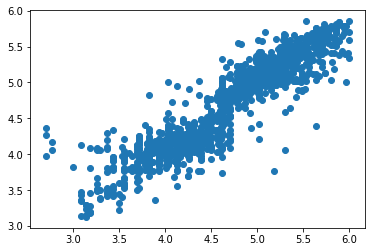

In [179]:
plt.scatter(y_test, prediction_rf)

In [181]:
print('MAE:', metrics.mean_absolute_error(y_test, price_pred))
print('MSE:', metrics.mean_squared_error(y_test, price_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, price_pred)))
print('R2:', metrics.r2_score(y_test, price_pred))

print("RMSE on Training set :", rmse_cv_train(rf).mean())
print("RMSE on Test set :", rmse_cv_test(rf).mean())

MAE: 0.248203365157911
MSE: 0.1082969086750396
RMSE: 0.3290849566222066
R2: 0.7583671339039076
RMSE on Training set : 0.26830822327675025
RMSE on Test set : 0.3054701328896833


In [182]:
perform.append(['rf_2_tuned', rmse_cv_train(rf).mean(), rmse_cv_test(rf).mean()])

## XGBoost

In [183]:
xgboost=XGBRegressor()
xgboost.fit(X_train,y_train)
prediction_XGB=xgboost.predict(X_test)

[14:37:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


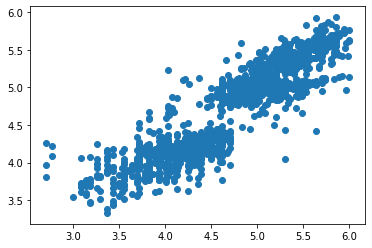

In [185]:
plt.scatter(y_test, prediction_XGB)

In [186]:
print("RMSE on Training set :", rmse_cv_train(xgboost).mean())
print("RMSE on Test set :", rmse_cv_test(xgboost).mean())

[14:37:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on Training set : 0.3037827226695319
[14:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:25] WARNING: src/object

In [187]:
perform.append(['xgboost_2', rmse_cv_train(xgboost).mean(), rmse_cv_test(xgboost).mean()])

[14:37:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

## Tuning XGBoost

In [188]:
import xgboost as xgb

In [189]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [190]:
dtest = xgb.DMatrix(X_test)

In [191]:
def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate,min_child_weight,n_estimators):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'learning_rate': learning_rate,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight,
              'n_estimators': n_estimators}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [192]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'learning_rate':(0.01,0.08),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight':(0,2),
                                            'n_estimators':(100,3000)})

In [193]:
xgb_bo.maximize(init_points=3, n_iter=15)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  1        | -0.287    |  0.525    |  0.05662  |  0.06632  |  5.012    |  0.2686   |  1.152e+0 |
|  2        | -0.6116   |  0.3736   |  0.3935   |  0.02116  |  5.388    |  0.4771   |  2.216e+0 |
|  3        | -0.4945   |  0.7161   |  0.7662   |  0.02427  |  4.926    |  1.969    |  2.878e+0 |
|  4        | -1.597    |  0.9      |  1.0      |  0.01     |  7.0      |  2.0      |  100.0    |
|  5        | -1.599    |  0.9      |  1.0      |  0.01     |  3.0      |  2.0      |  1.594e+0 |
|  6        | -0.4928   |  0.4293   |  0.1678   |  0.0249   |  3.928    |  1.04     |  1.153e+0 |
|  7        | -0.27     |  0.9      |  0.0      |  0.08     |  7.0      |  0.0      |  1.137e+0 |
|  8        | -1.595    |  0.747    |  0.04298  |  0.01003  |  4.562    |  0.9303   |  2.852e+0 |
|  9        | -0.322

In [192]:
xgb_bo.max

{'target': -0.256414,
 'params': {'colsample_bytree': 0.9,
  'gamma': 0.0,
  'learning_rate': 0.08,
  'max_depth': 7.0,
  'min_child_weight': 0.0,
  'n_estimators': 1124.92669743291}}

## Tuned XGBoost

In [194]:
xgboost=XGBRegressor(learning_rate=0.08, n_estimators=1125, max_depth=7, colsambple_bytree=0.9, 
                     gamma=0, min_child_weight=0)

In [195]:
xgboost.fit(X_train,y_train)

[14:48:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsambple_bytree=0.9,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, importance_type='gain', learning_rate=0.08,
             max_delta_step=0, max_depth=7, min_child_weight=0, missing=None,
             n_estimators=1125, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [196]:
prediction_XGB=xgboost.predict(X_test)

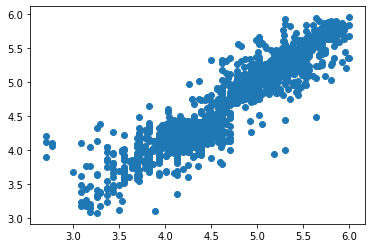

In [197]:
plt.scatter(y_test, prediction_XGB)

In [198]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_XGB))
print('MSE:', metrics.mean_squared_error(y_test, prediction_XGB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_XGB)))
print('R2 score:', metrics.r2_score(y_test, prediction_XGB))
print("RMSE on Training set :", rmse_cv_train(xgboost).mean())
print("RMSE on Test set :", rmse_cv_test(xgboost).mean())

MAE: 0.1766666014532804
MSE: 0.06598829505423466
RMSE: 0.2568818698433867
R2 score: 0.8527664265044315
[14:49:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on Training set : 0.2656921201988259
[14:49:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:44] WARNING: src/objective/regressio

In [200]:
perform.append(['xgboost_2_tuned', rmse_cv_train(xgboost).mean(), rmse_cv_test(xgboost).mean()])

[14:50:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

## Evaluasi

In [201]:
perform

[['linear_1', 0.29901890094492123, 0.30472863889466917],
 ['Ridge_1', 0.2980731107638676, 0.30153720962093067],
 ['Lasso_1', 0.2981694054090286, 0.30461239975115895],
 ['elasticNet_1', 0.2982248231687707, 0.3026401814673747],
 ['random_forest1', 0.25377539280999467, 0.30847620193454434],
 ['random_forest1_tuned', 0.24503057177927184, 0.2979206788532014],
 ['xgboost_1', 0.27459542412489146, 0.29992502084886763],
 ['xgboost_1_tuned', 0.2495838626430673, 0.2864883542094626],
 ['linear_2', 0.3458452313274425, 0.33316565450336855],
 ['rf_2', 0.2832930172726179, 0.3157406880551684],
 ['rf_2_tuned', 0.2685600243378033, 0.3037999565412647],
 ['xgboost_2', 0.3037827226695319, 0.311028699781357],
 ['xgboost_2_tuned', 0.2656921201988259, 0.29520242513900974]]

using these parameter, the algorithm can work well. let's try to cut the feature again

## Cut the Feature again

In [216]:
feature_importance2=xgboost.get_booster().get_score(importance_type='weight')

In [217]:
df_feature2=pd.DataFrame({'fitur':list(feature_importance2.keys()), 'weight':list(feature_importance2.values())})
df_feature2=df_feature2.sort_values('weight', ascending=False)
df_feature2

,fitur,weight
6,latitude,18384
13,longitude,13138
9,len_amenities,6500
10,availability_365,5959
20,mean,5471
15,reviews_per_month,4368
8,calculated_host_listings_count,3296
11,minimum_nights,2992
14,cleaning_fee,2730
17,review_scores_rating,2164


In [219]:
df_feature2['fitur'].count()

21

ambil 16 data

In [224]:
feat_significant2=df_feature2[df_feature2['weight']>1000]['fitur']
list_feat2=list(np.array(feat_significant2))
data_eliminate2=data_price[list_feat2]

In [225]:
data_eliminate2

,latitude,longitude,len_amenities,availability_365,mean,reviews_per_month,calculated_host_listings_count,minimum_nights,cleaning_fee,review_scores_rating,number_of_reviews,beds,security_deposit,guests_included_fixed,bedrooms,bathrooms
id,,,,,,,,,,,,,,,,
49091,0.893043,4.652014,2.197225,5.902633,0.210000,0.009950,1.098612,5.198497,0.000000,4.553877,0.693147,0.693147,0.000000,0.693147,0.693147,0.693147
50646,0.846876,4.651913,2.564949,5.899897,0.411838,0.239017,0.693147,4.510860,0.000000,4.521789,2.944439,0.693147,0.000000,1.098612,0.693147,0.693147
56334,0.893006,4.652022,2.302585,5.899897,0.389094,0.182322,1.098612,1.945910,0.000000,4.595120,3.044522,0.693147,0.000000,0.693147,0.693147,0.693147
71609,0.852460,4.653552,3.258097,5.902633,0.254007,0.148420,2.302585,0.693147,4.025352,4.442651,2.772589,1.386294,5.620401,1.609438,1.098612,0.693147
71896,0.852571,4.653576,3.091042,5.902633,0.277114,0.198851,2.302585,0.693147,3.367296,4.406719,3.135494,0.693147,4.934474,0.693147,0.693147,0.000000
71903,0.853146,4.653589,2.944439,5.883322,0.296756,0.343590,2.302585,0.693147,3.367296,4.488636,3.761200,1.098612,4.934474,0.693147,0.693147,0.000000
71907,0.851637,4.653611,2.995732,5.187386,0.273176,0.231112,2.302585,0.693147,4.248495,4.418841,3.295837,2.079442,5.620401,1.609438,0.693147,0.693147
241503,0.842877,4.653137,3.583519,4.442651,0.360908,1.050822,1.609438,4.510860,0.000000,4.605170,5.164786,0.693147,5.303305,0.693147,0.693147,0.693147
241508,0.843539,4.653118,3.496508,5.010635,0.370017,1.121678,1.609438,4.510860,0.000000,4.605170,5.298317,1.098612,5.303305,0.693147,0.693147,0.693147


# Predict 3

In [226]:
X_train, X_test, y_train, y_test = train_test_split(data_eliminate2, target_price, test_size=0.2)

## Linear

In [227]:
linear=LinearRegression()

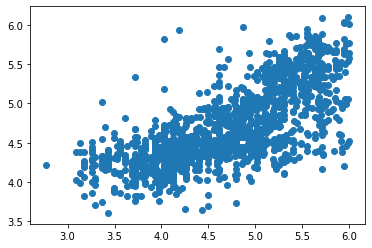

In [228]:
linear.fit(X_train,y_train)
price_pred = linear.predict(X_test)
plt.scatter(y_test,price_pred)

In [229]:
print('MAE:', metrics.mean_absolute_error(y_test, price_pred))
print('MSE:', metrics.mean_squared_error(y_test, price_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, price_pred)))
print('R2:', metrics.r2_score(y_test, price_pred))
print("RMSE on Training set :", rmse_cv_train(linear).mean())
print("RMSE on Test set :", rmse_cv_test(linear).mean())

MAE: 0.3681091740347085
MSE: 0.23225270916479424
RMSE: 0.48192604117726845
R2: 0.5029899459454953
RMSE on Training set : 0.4803207017277004
RMSE on Test set : 0.48581755683931005


In [236]:
perform.append(['linear_3', rmse_cv_train(linear).mean(), rmse_cv_test(linear).mean()])

## Random Forest

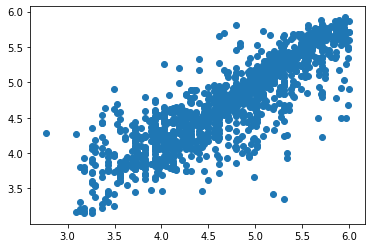

In [238]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
prediction_rf=rf.predict(X_test)
plt.scatter(y_test, prediction_rf)

In [239]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rf))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf)))
print('R2:', metrics.r2_score(y_test, prediction_rf))
print("RMSE on Training set :", rmse_cv_train(rf).mean())
print("RMSE on Test set :", rmse_cv_test(rf).mean())

MAE: 0.23263464357467845
MSE: 0.120545177801257
RMSE: 0.3471961661672793
R2: 0.7420388956905466
RMSE on Training set : 0.3561126787901494
RMSE on Test set : 0.4039295244203881


In [240]:
perform.append(['rf_3', rmse_cv_train(rf).mean(), rmse_cv_test(rf).mean()])

## Tuning RF

In [232]:
rf_bo=BayesianOptimization(rf_evaluate, {'max_depth': (1,20),'min_samples_split':(2,20),'min_samples_leaf':(2,20),
                                        'n_estimators':(10,1000)
                                        })
rf_bo.maximize(init_points=3, n_iter=15)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.5411   |  1.067    |  6.406    |  10.21    |  401.4    |
|  2        | -0.3627   |  19.93    |  11.55    |  17.84    |  862.5    |
|  3        | -0.5424   |  1.275    |  13.14    |  18.48    |  731.5    |
|  4        | -0.3822   |  20.0     |  20.0     |  20.0     |  10.0     |
|  5        | -0.5418   |  1.0      |  20.0     |  2.0      |  1e+03    |
|  6        | -0.3377   |  20.0     |  2.0      |  2.0      |  182.2    |
|  7        | -0.5414   |  1.0      |  20.0     |  20.0     |  146.8    |
|  8        | -0.5442   |  1.0      |  2.0      |  2.0      |  10.0     |
|  9        | -0.3777   |  20.0     |  20.0     |  2.0      |  284.5    |
|  10       | -0.3368   |  20.0     |  2.0      |  2.0      |  559.8    |
|  11       | -0.3773   |  20.0     |  20.0     |  20.0     |  516.6    |
|  12       | -0.3497   |  20.0     | 

In [233]:
rf_bo.max

{'target': -0.3361977823718427,
 'params': {'max_depth': 20.0,
  'min_samples_leaf': 2.0,
  'min_samples_split': 2.0,
  'n_estimators': 899.520319852333}}

## Best RF

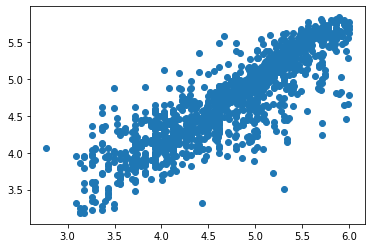

In [241]:
rf=RandomForestRegressor(max_depth=20,
                       min_samples_split=2,
                       min_samples_leaf=2,
                       n_estimators =899 
                       )
rf.fit(X_train,y_train)
prediction_rf=rf.predict(X_test)
plt.scatter(y_test, prediction_rf)

In [242]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rf))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf)))
print('R2:', metrics.r2_score(y_test, prediction_rf))
print("RMSE on Training set :", rmse_cv_train(rf).mean())
print("RMSE on Test set :", rmse_cv_test(rf).mean())

MAE: 0.22198934675261223
MSE: 0.1102995532915765
RMSE: 0.33211376558579514
R2: 0.7639640581986202
RMSE on Training set : 0.33652012231322354
RMSE on Test set : 0.3874177406526352


In [243]:
perform.append(['rf_3_tuned', rmse_cv_train(rf).mean(), rmse_cv_test(rf).mean()])

## XGBoost

[15:24:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


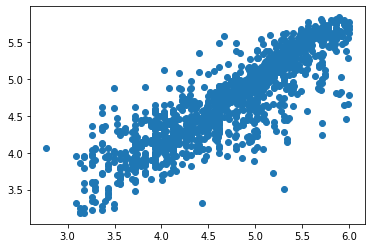

In [244]:
xgboost=XGBRegressor()
xgboost.fit(X_train,y_train)
prediction_XGB=xgboost.predict(X_test)
plt.scatter(y_test, prediction_rf)

In [245]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_XGB))
print('MSE:', metrics.mean_squared_error(y_test, prediction_XGB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_XGB)))
print('R2:', metrics.r2_score(y_test, prediction_XGB))

print("RMSE on Training set :", rmse_cv_train(xgboost).mean())
print("RMSE on Test set :", rmse_cv_test(xgboost).mean())

MAE: 0.2756870097654741
MSE: 0.14407903242552447
RMSE: 0.37957743929997273
R2: 0.6916775354249113
[15:24:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on Training set : 0.3777907915878295
[15:24:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:05] WARNING: src/objective/regression_obj

In [246]:
perform.append(['XGBoost_3', rmse_cv_train(xgboost).mean(), rmse_cv_test(xgboost).mean()])

[15:24:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

## Tuning XGBoost

In [247]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [248]:
def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate,min_child_weight,n_estimators):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'learning_rate': learning_rate,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight,
              'n_estimators': n_estimators}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [249]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'learning_rate':(0.01,0.08),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight':(0,2),
                                            'n_estimators':(10,3000)})

In [250]:
xgb_bo.maximize(init_points=3, n_iter=15)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  1        | -1.168    |  0.6447   |  0.6633   |  0.01359  |  3.243    |  1.727    |  2.287e+0 |
|  2        | -0.3901   |  0.4718   |  0.5535   |  0.06307  |  3.239    |  1.434    |  2.723e+0 |
|  3        | -0.3591   |  0.8129   |  0.7432   |  0.07839  |  5.402    |  0.642    |  709.6    |
|  4        | -0.3588   |  0.7273   |  0.6944   |  0.08     |  5.2      |  0.5911   |  707.4    |
|  5        | -0.353    |  0.9      |  1.0      |  0.08     |  7.0      |  2.0      |  10.0     |
|  6        | -1.612    |  0.9      |  5.422e-0 |  0.01     |  7.0      |  1.084e-0 |  3e+03    |
|  7        | -1.626    |  0.3      |  0.0      |  0.01     |  3.0      |  0.0      |  1.382e+0 |
|  8        | -1.611    |  0.9      |  1.0      |  0.01     |  7.0      |  2.0      |  313.2    |
|  9        | -0.353

In [251]:
xgb_bo.max

{'target': -0.339938,
 'params': {'colsample_bytree': 0.9,
  'gamma': 0.0,
  'learning_rate': 0.08,
  'max_depth': 7.0,
  'min_child_weight': 0.0,
  'n_estimators': 2538.466976539934}}

## Latest XGBoost

[15:28:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


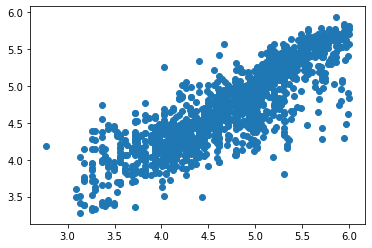

In [254]:
xgboost1=XGBRegressor(learning_rate=0.08, n_estimators=2538, max_depth=7, colsambple_bytree=0.9, 
                     gamma=1, min_child_weight=2)
xgboost1.fit(X_train,y_train)
prediction_XGB1=xgboost.predict(X_test)
plt.scatter(y_test, prediction_XGB1)

In [255]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_XGB1))
print('MSE:', metrics.mean_squared_error(y_test, prediction_XGB1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_XGB1)))
print('R2 score:', metrics.r2_score(y_test, prediction_XGB1))
print("RMSE on Training set :", rmse_cv_train(xgboost).mean())
print("RMSE on Test set :", rmse_cv_test(xgboost).mean())

MAE: 0.25467015781116636
MSE: 0.12539367982632202
RMSE: 0.35410970027143
R2 score: 0.7316633256391716
[15:28:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on Training set : 0.3533918307565601
[15:29:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:42] WARNING: src/objective/regression

In [256]:
perform.append(['XGBoost_3_tuned', rmse_cv_train(xgboost1).mean(), rmse_cv_test(xgboost1).mean()])

[15:29:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

#### evaluasi XGBoost

In [257]:
feature_importance_ef=xgboost1.get_booster().get_score(importance_type='weight')
df_feature_ef=pd.DataFrame({'fitur':list(feature_importance_ef.keys()), 'weight':list(feature_importance_ef.values())})
df_feature_ef=df_feature_ef.sort_values('weight', ascending=False)


In [258]:
df_feature_ef

,fitur,weight
2,latitude,239
10,longitude,217
6,calculated_host_listings_count,146
7,cleaning_fee,140
8,minimum_nights,136
4,len_amenities,128
11,availability_365,109
5,beds,107
12,reviews_per_month,85
1,bathrooms,75


## Evaluation

In [259]:
df_perform=pd.DataFrame(perform, columns=['model','rmse training','rmse test'])

In [260]:
df_perform

,model,rmse training,rmse test
0,linear_1,0.299019,0.304729
1,Ridge_1,0.298073,0.301537
2,Lasso_1,0.298169,0.304612
3,elasticNet_1,0.298225,0.302640
4,random_forest1,0.253775,0.308476
5,random_forest1_tuned,0.245031,0.297921
6,xgboost_1,0.274595,0.299925
7,xgboost_1_tuned,0.249584,0.286488
8,linear_2,0.345845,0.333166
9,rf_2,0.283293,0.315741


Overall, for latest experiment, the best model is tuned random forest with 0.35 score at training, and 0.38 score at test.

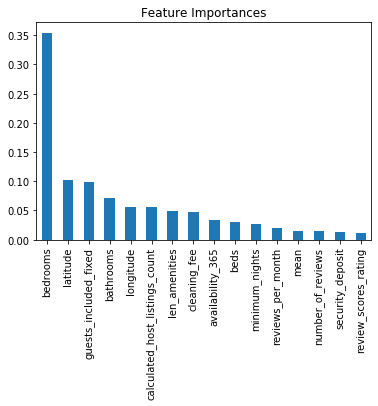

In [264]:
coef1=pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

This is the feature importance for the final model, bedrooms now is the most important feature to determine the price of listing.

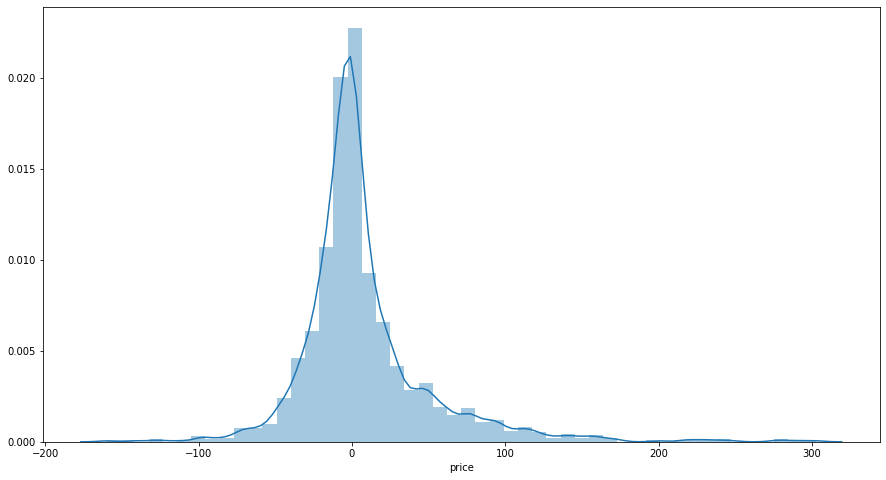

In [261]:
residual=np.expm1(y_test)-np.expm1(prediction_rf)
plt.figure(figsize=(15,8))
sns.distplot(residual)

In [262]:
residual.std()

43.490411553253125

From the residual plot, the model still looks good with residual plot centered at 0 value and normally distributed with standard deviation 43.5. Finally, I decided to use the algorithm from last experiment. The best one is from 1st experiment which have 0.24 on training set and 0.28 on test set. The 3rd experiment with 16 feature, perform quite good with 0.33 on training set and 0.38 at test set. The error score is higher, but can cut the feature and use only 16 feature. The latest algorihm is still good but have pretty much advantage on computation sector

# Model Final

## Model Terbaik

In [265]:
X_train, X_test, y_train, y_test = train_test_split(data_price, target_price, test_size=0.2)

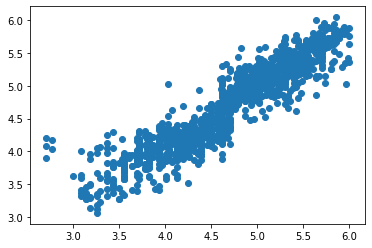

In [268]:
xgboost=XGBRegressor(learning_rate=0.05, n_estimators=2200, max_depth=3, colsample_bytree=0.4603, 
                     gamma=0.0468, min_child_weight=1.7817)
xgboost.fit(X_train,y_train)
prediction_XGB=xgboost.predict(X_test)
plt.scatter(y_test, prediction_XGB)

In [269]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_XGB))
print('MSE:', metrics.mean_squared_error(y_test, prediction_XGB))
print('R2 score:', metrics.r2_score(y_test, prediction_XGB))
print("RMSE on Training set :", rmse_cv_train(xgboost).mean())
print("RMSE on Test set :", rmse_cv_test(xgboost).mean())

MAE: 0.17838291513230484
MSE: 0.05976422902216164
R2 score: 0.8666536088118593
RMSE on Training set : 0.25107229751229704
RMSE on Test set : 0.283085169574151


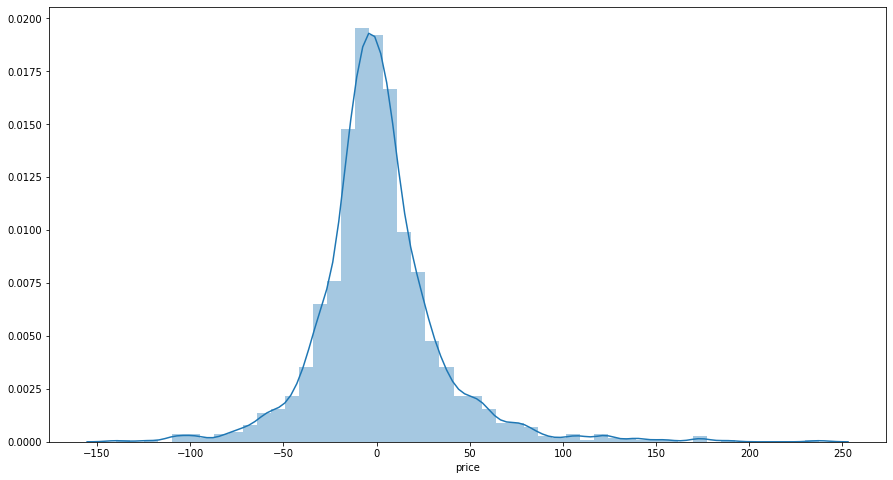

In [270]:
residual=np.expm1(y_test)-np.expm1(prediction_XGB)
plt.figure(figsize=(15,8))
sns.distplot(residual)


In [271]:
residual.std()

32.91038722778941

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

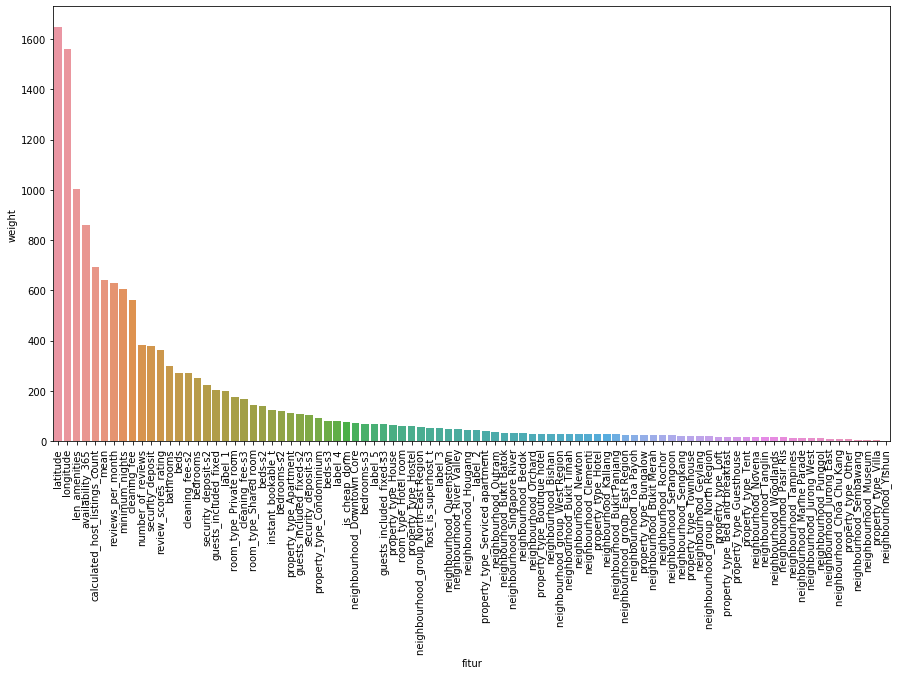

In [272]:
plt.figure(figsize=(15,8))
sns.barplot(df_feature['fitur'],df_feature['weight'])
plt.xticks(rotation=90)

## Model Terefektif

In [273]:
X_train, X_test, y_train, y_test = train_test_split(data_eliminate2, target_price, test_size=0.2)

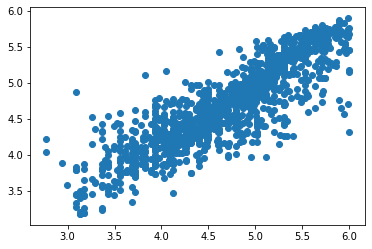

In [274]:
rf=RandomForestRegressor(max_depth=20,
                       min_samples_split=2,
                       min_samples_leaf=2,
                       n_estimators =899 
                       )
rf.fit(X_train,y_train)
prediction_rf=rf.predict(X_test)
plt.scatter(y_test, prediction_rf)

In [275]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rf))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf)))
print('R2:', metrics.r2_score(y_test, prediction_rf))
print("RMSE on Training set :", rmse_cv_train(rf).mean())
print("RMSE on Test set :", rmse_cv_test(rf).mean())

MAE: 0.2203336775750472
MSE: 0.10500614427498711
RMSE: 0.32404651560383596
R2: 0.7713341778025294
RMSE on Training set : 0.34181478691294287
RMSE on Test set : 0.3738620873607542


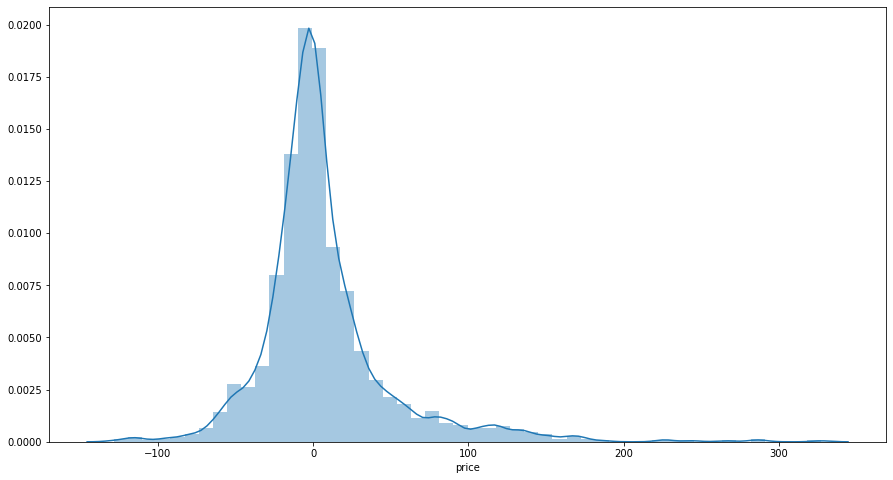

In [276]:
residual=np.expm1(y_test)-np.expm1(prediction_rf)
plt.figure(figsize=(15,8))
sns.distplot(residual)


In [286]:
residual.std()

43.015356065073526

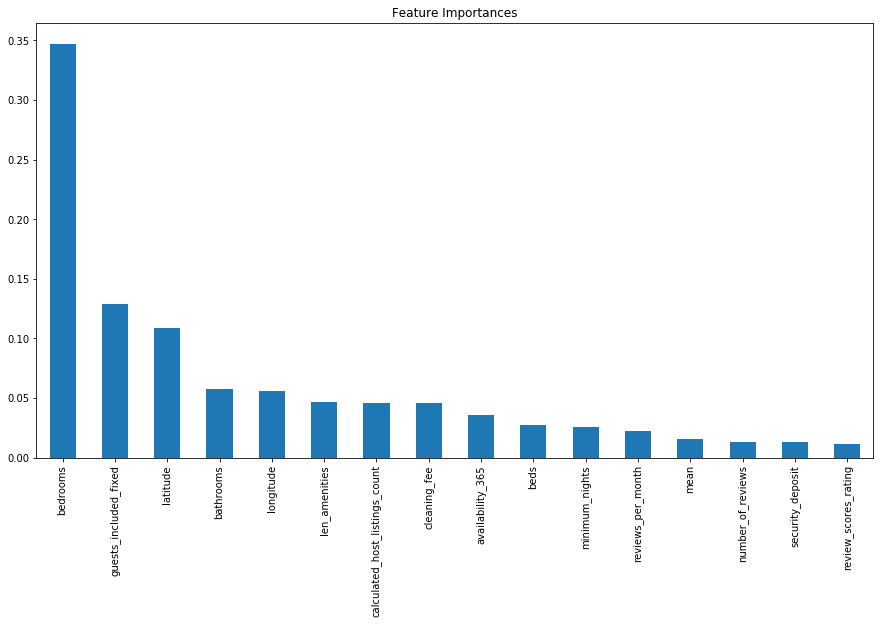

In [277]:
plt.figure(figsize=(15,8))
coef1=pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

## CV Plot RF

In [278]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

In [279]:
scores_training= np.sqrt(-cross_val_score(rf, X_train, y_train, scoring = scorer, cv = 15))

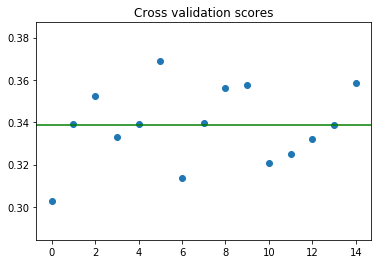

In [280]:
plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores_training)), scores_training)
plt.axhline(y=np.mean(scores_training), color='g') # Mean value of cross validation scores
plt.show()

In [281]:
scores_test= np.sqrt(-cross_val_score(rf, X_test, y_test, scoring = scorer, cv = 15))

In [282]:
np.mean(scores_test)

0.37150271272550267

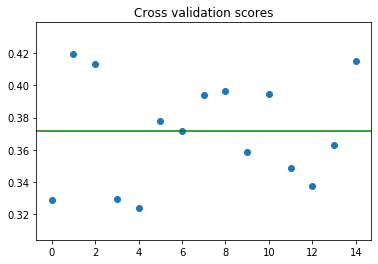

In [283]:
plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores_test)), scores_test)
plt.axhline(y=np.mean(scores_test), color='g') # Mean value of cross validation scores
plt.show()

# Re-Train with all data

after find the best model, I will train the model again but with all of the data so the model can learn more

In [284]:
model_final=RandomForestRegressor(max_depth=20,
                       min_samples_split=2,
                       min_samples_leaf=2,
                       n_estimators =899 
                       )
model_final.fit(data_eliminate2,target_price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=899,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [285]:
print("RMSE on Training set :", rmse_cv_train(model_final).mean())

RMSE on Training set : 0.34182507247825866


# Eksport Model Final 

In [588]:
import pickle
filename = 'price_prediction.sav';
pickle.dump(model_final, open(filename, 'wb'))

## tes PCA

In [590]:
data_eliminate2

,latitude,longitude,availability_365,len_amenities,reviews_per_month,mean,minimum_nights,number_of_reviews,calculated_host_listings_count,review_scores_rating,cleaning_fee,security_deposit,beds,bedrooms,guests_included_fixed,bathrooms
id,,,,,,,,,,,,,,,,
49091,0.893043,4.652014,5.902633,2.197225,0.009950,0.210000,5.198497,0.693147,1.098612,4.553877,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147
50646,0.846876,4.651913,5.899897,2.564949,0.239017,0.411838,4.510860,2.944439,0.693147,4.521789,0.000000,0.000000,0.693147,0.693147,1.098612,0.693147
56334,0.893006,4.652022,5.899897,2.302585,0.182322,0.389094,1.945910,3.044522,1.098612,4.595120,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147
71609,0.852460,4.653552,5.902633,3.258097,0.148420,0.254007,0.693147,2.772589,2.302585,4.442651,4.025352,5.620401,1.386294,1.098612,1.609438,0.693147
71896,0.852571,4.653576,5.902633,3.091042,0.198851,0.277114,0.693147,3.135494,2.302585,4.406719,3.367296,4.934474,0.693147,0.693147,0.693147,0.000000
71903,0.853146,4.653589,5.883322,2.944439,0.343590,0.296756,0.693147,3.761200,2.302585,4.488636,3.367296,4.934474,1.098612,0.693147,0.693147,0.000000
71907,0.851637,4.653611,5.187386,2.995732,0.231112,0.273176,0.693147,3.295837,2.302585,4.418841,4.248495,5.620401,2.079442,0.693147,1.609438,0.693147
241503,0.842877,4.653137,4.442651,3.583519,1.050822,0.360908,4.510860,5.164786,1.609438,4.605170,0.000000,5.303305,0.693147,0.693147,0.693147,0.693147
241508,0.843539,4.653118,5.010635,3.496508,1.121678,0.370017,4.510860,5.298317,1.609438,4.605170,0.000000,5.303305,1.098612,0.693147,0.693147,0.693147


In [591]:
# from sklearn.preprocessing import StandardScaler

In [593]:
# scaler = StandardScaler()
# scaler.fit(data_eliminate2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [595]:
# scaled_data = scaler.transform(data_eliminate2)

In [596]:
from sklearn.decomposition import PCA

In [597]:
pca = PCA(n_components=3)

In [598]:
pca.fit(data_eliminate2)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [599]:
x_pca = pca.transform(data_eliminate2)

In [600]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, target_price, test_size=0.2)

In [601]:
tes_PCA=RandomForestRegressor(max_depth=20,
                       min_samples_split=2,
                       min_samples_leaf=2,
                       n_estimators =75 
                       )
tes_PCA.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [604]:
prediction_PCA=tes_PCA.predict(X_test)

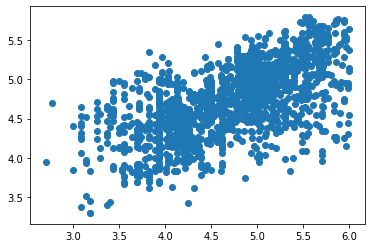

In [605]:
plt.scatter(y_test, prediction_PCA)

In [607]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_PCA))
print('MSE:', metrics.mean_squared_error(y_test, prediction_PCA))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_PCA)))
print('R2 score:', metrics.r2_score(y_test, prediction_PCA))

MAE: 0.3962704027379511
MSE: 0.2815241611769042
RMSE: 0.5305885045653592
R2 score: 0.3881133408435342


In [609]:
pca.explained_variance_ratio_

array([0.32839313, 0.21998196, 0.18700763])

In [287]:
data_eliminate2

,latitude,longitude,len_amenities,availability_365,mean,reviews_per_month,calculated_host_listings_count,minimum_nights,cleaning_fee,review_scores_rating,number_of_reviews,beds,security_deposit,guests_included_fixed,bedrooms,bathrooms
id,,,,,,,,,,,,,,,,
49091,0.893043,4.652014,2.197225,5.902633,0.210000,0.009950,1.098612,5.198497,0.000000,4.553877,0.693147,0.693147,0.000000,0.693147,0.693147,0.693147
50646,0.846876,4.651913,2.564949,5.899897,0.411838,0.239017,0.693147,4.510860,0.000000,4.521789,2.944439,0.693147,0.000000,1.098612,0.693147,0.693147
56334,0.893006,4.652022,2.302585,5.899897,0.389094,0.182322,1.098612,1.945910,0.000000,4.595120,3.044522,0.693147,0.000000,0.693147,0.693147,0.693147
71609,0.852460,4.653552,3.258097,5.902633,0.254007,0.148420,2.302585,0.693147,4.025352,4.442651,2.772589,1.386294,5.620401,1.609438,1.098612,0.693147
71896,0.852571,4.653576,3.091042,5.902633,0.277114,0.198851,2.302585,0.693147,3.367296,4.406719,3.135494,0.693147,4.934474,0.693147,0.693147,0.000000
71903,0.853146,4.653589,2.944439,5.883322,0.296756,0.343590,2.302585,0.693147,3.367296,4.488636,3.761200,1.098612,4.934474,0.693147,0.693147,0.000000
71907,0.851637,4.653611,2.995732,5.187386,0.273176,0.231112,2.302585,0.693147,4.248495,4.418841,3.295837,2.079442,5.620401,1.609438,0.693147,0.693147
241503,0.842877,4.653137,3.583519,4.442651,0.360908,1.050822,1.609438,4.510860,0.000000,4.605170,5.164786,0.693147,5.303305,0.693147,0.693147,0.693147
241508,0.843539,4.653118,3.496508,5.010635,0.370017,1.121678,1.609438,4.510860,0.000000,4.605170,5.298317,1.098612,5.303305,0.693147,0.693147,0.693147


In [577]:
value=np.zeros(16)

In [578]:
df_tes=pd.DataFrame(value)

In [579]:
df_tes=df_tes.T

In [580]:
df_tes.columns=data_eliminate2.columns

In [581]:
for item in df_tes.columns:
    df_tes[item]=0

In [582]:
df_tes

,latitude,longitude,availability_365,len_amenities,reviews_per_month,mean,minimum_nights,number_of_reviews,calculated_host_listings_count,review_scores_rating,cleaning_fee,security_deposit,beds,bedrooms,guests_included_fixed,bathrooms
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [583]:
df_tes=df_tes.T

In [584]:
df_tes

,0
latitude,0
longitude,0
availability_365,0
len_amenities,0
reviews_per_month,0
mean,0
minimum_nights,0
number_of_reviews,0
calculated_host_listings_count,0
review_scores_rating,0
